<h1 style="color:red">Import data from mongo</h1>

In [14]:
import pymongo
import pandas as pd
from pymongo import MongoClient
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))

In [15]:
del data['_id']
numberOfMovies = 32
data.head(numberOfMovies)

,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,query,retweets,tweets
0,3,1.845403,24710273.0,0,0.009766,0.014776,0.036671,0.040417,#TheAccountant,10957,16708
1,3,0.810219,2182216.0,0,0.029692,0.014055,0.026842,0.018494,#MaxSteel,1301,1781
2,3,2.458964,11767210.0,0,0.015363,0.015290,0.014551,0.026469,#KevinHartWhatNow,14787,18045
3,3,2.591795,707021.0,1,0.002675,0.004338,0.054505,0.053073,#PricelessTheMovie,511,975
4,3,2.371755,28501448.0,0,0.009082,0.015891,0.018030,0.032273,#MadeaHalloween,9847,12710
5,3,2.181918,22872490.0,1,0.003739,0.006961,0.059013,0.034859,#JackReacherMovie,8783,10032
6,3,0.787846,14065500.0,1,0.010604,0.008255,0.023187,0.020197,#OuijaMovie,12413,29983
7,3,2.365276,5461475.0,0,0.010428,0.012843,0.019997,0.019704,#KeepingUpWithTheJoneses,2638,3882
8,3,1.616158,14860425.0,1,0.008168,0.016579,0.049321,0.034194,#InfernoMovie,7215,9444
9,3,1.344280,44725.0,0,0.017657,0.025000,0.008255,0.022388,#GimmeDanger,759,944


<h1 style="color:blue">Make table readable</h1>

In [16]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
#punctuation = data['punctuation']
#data.drop(labels=['punctuation'], axis=1, inplace=True)
#data.insert(4, 'punctuation', punctuation)
data.head(numberOfMovies)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets
0,#TheAccountant,16708,10957,3,1.845403,24710273.0,0,0.009766,0.014776,0.036671,0.040417
1,#MaxSteel,1781,1301,3,0.810219,2182216.0,0,0.029692,0.014055,0.026842,0.018494
2,#KevinHartWhatNow,18045,14787,3,2.458964,11767210.0,0,0.015363,0.015290,0.014551,0.026469
3,#PricelessTheMovie,975,511,3,2.591795,707021.0,1,0.002675,0.004338,0.054505,0.053073
4,#MadeaHalloween,12710,9847,3,2.371755,28501448.0,0,0.009082,0.015891,0.018030,0.032273
5,#JackReacherMovie,10032,8783,3,2.181918,22872490.0,1,0.003739,0.006961,0.059013,0.034859
6,#OuijaMovie,29983,12413,3,0.787846,14065500.0,1,0.010604,0.008255,0.023187,0.020197
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,5461475.0,0,0.010428,0.012843,0.019997,0.019704
8,#InfernoMovie,9444,7215,3,1.616158,14860425.0,1,0.008168,0.016579,0.049321,0.034194
9,#GimmeDanger,944,759,3,1.344280,44725.0,0,0.017657,0.025000,0.008255,0.022388


In [17]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(10, 'gross', gross)
data.head(numberOfMovies)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross
0,#TheAccountant,16708,10957,3,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0
1,#MaxSteel,1781,1301,3,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0
2,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0
3,#PricelessTheMovie,975,511,3,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0
4,#MadeaHalloween,12710,9847,3,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0
5,#JackReacherMovie,10032,8783,3,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0
6,#OuijaMovie,29983,12413,3,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0
8,#InfernoMovie,9444,7215,3,1.616158,1,0.008168,0.016579,0.049321,0.034194,14860425.0
9,#GimmeDanger,944,759,3,1.344280,0,0.017657,0.025000,0.008255,0.022388,44725.0


In [18]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(numberOfMovies)

,query,tweets,retweets,daysInTheater,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#TheAccountant,16708,10957,3,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,3,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,3,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,3,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,3,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,3,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,3,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,3,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,3,1.616158,1,0.008168,0.016579,0.049321,0.034194,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,3,1.344280,0,0.017657,0.025000,0.008255,0.022388,44725.0,1.490833e+04


<h2>Plotting</h2>

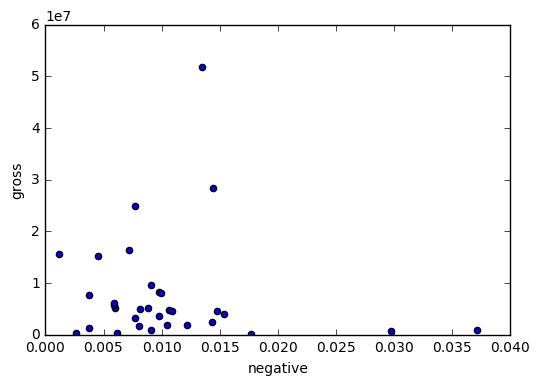

In [19]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

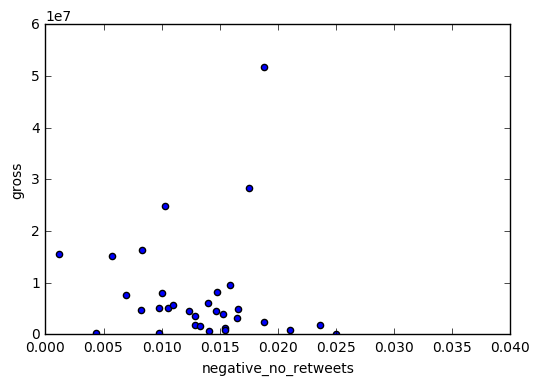

In [20]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

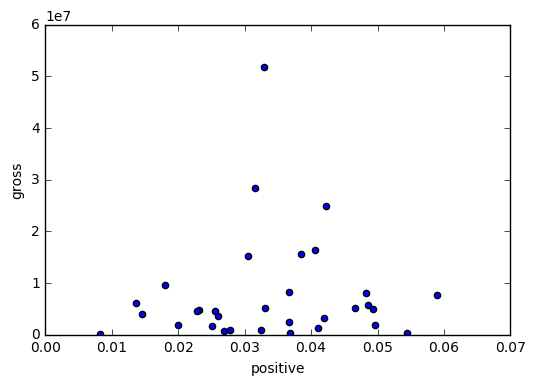

In [21]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive'], data['grossPerDay'])
plt.show()

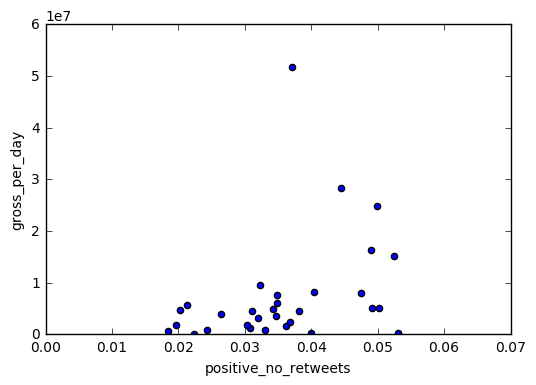

In [22]:
plt.ylabel('gross_per_day')
plt.xlabel('positive_no_retweets')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

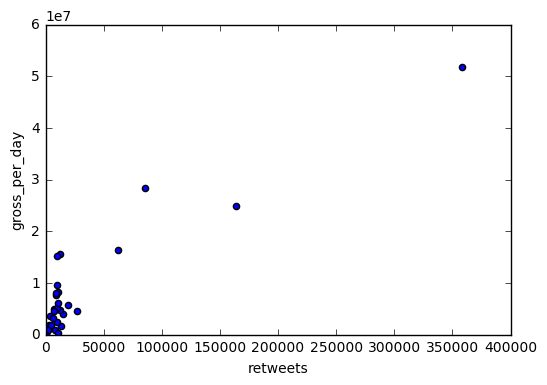

In [23]:
plt.ylabel('gross_per_day')
plt.xlabel('retweets')
plt.axis([0, 400000, 0, 60000000])
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

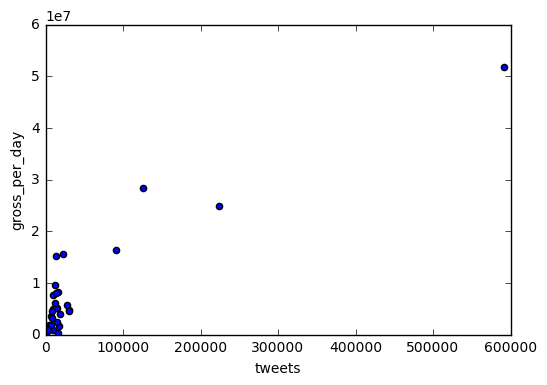

In [24]:
plt.ylabel('gross_per_day')
plt.xlabel('tweets')
plt.axis([0, 600000, 0, 60000000])
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [99]:
data['percentretweets'] = data.retweets/data.tweets
data['square_positive'] = data.positive**2
data.head(numberOfMovies)

,tweets,retweets,percentretweets,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay,grossByCategory,square_positive
0,16708,10957,0.655794,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06,2,0.001345
1,1781,1301,0.730488,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05,0,0.000721
2,18045,14787,0.819451,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06,2,0.000212
3,975,511,0.524103,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05,0,0.002971
4,12710,9847,0.774744,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06,2,0.000325
5,10032,8783,0.875498,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06,2,0.003483
6,29983,12413,0.414001,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06,2,0.000538
7,3882,2638,0.679547,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06,1,0.000400
8,9444,7215,0.763977,1.616158,1,0.008168,0.016579,0.049321,0.034194,14860425.0,4.953475e+06,2,0.002433
9,944,759,0.804025,1.344280,0,0.017657,0.025000,0.008255,0.022388,44725.0,1.490833e+04,0,0.000068


In [26]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
del data['daysInTheater']
data.head(numberOfMovies)

,query,tweets,retweets,percentretweets,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay
0,#TheAccountant,16708,10957,0.655794,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,0.730488,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.524103,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.774744,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.875498,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,1.616158,1,0.008168,0.016579,0.049321,0.034194,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,0.804025,1.344280,0,0.017657,0.025000,0.008255,0.022388,44725.0,1.490833e+04


In [27]:
del data['query']

<h1 style="color:orange">Sklearn Stuff</h1>

<h1 style="color:red">Linear Regression</h1>

In [100]:
total_data = data.values
f_col = ['tweets', 'positive', 'retweets', 'favorites_per_tweet', 'movie_in_query', 'positive_no_retweets', 'square_positive']
X = data[f_col]
y = data[['grossPerDay']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
scaled_X = preprocessing.scale(X)
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
X_train = scaled_X
y_train = y
X_test = scaled_X

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)

print (clf.intercept_)
print (clf.coef_)

[ 7748989.84791667]
[[ 1387634.69160128  -262475.24392349  7864048.61330766  -394786.85269289
    474408.90644782  2725816.51262186  -463010.64134044]]


In [102]:
y_test = clf.predict(X_test)

In [103]:
y_test

array([[  5767782.20224855],
       [   551816.93820628],
       [  3698426.10850386],
       [  6590108.02836528],
       [  4315848.04982607],
       [  3332020.32010916],
       [  3865524.65132174],
       [   354887.23439389],
       [  4123806.27551095],
       [  1797526.43253124],
       [ 13195785.16063433],
       [  7201605.14810899],
       [ 17157922.59697292],
       [  3063489.64842554],
       [  7924657.56874135],
       [  7635907.81495898],
       [  4036536.96075042],
       [  5490431.43086754],
       [ 27828438.83239365],
       [ 13667399.75017337],
       [  4238001.02580381],
       [  2311262.25232688],
       [  1327005.70750248],
       [  5341880.89207863],
       [  2119101.76812639],
       [ 53297896.16136643],
       [  5227571.04821209],
       [  9728597.46522037],
       [  2393427.88180534],
       [  8805705.95979756],
       [  6295438.65436034],
       [  5281865.16368895]])

In [104]:
import numpy as np
np.sqrt(((y_test-y_train)**2).mean())

grossPerDay    3.476604e+06
dtype: float64

<h1 style="color:red">Logistic Regression</h1>

In [32]:
def split_gross_categories(value):
    if value < 1000000:
        return 0
    elif value < 3000000:
        return 1
    elif value < 10000000:
        return 2
    else:
        return 3

data['grossByCategory'] = 0

f=lambda x: split_gross_categories(x)
data.grossByCategory = data.grossPerDay.map(f)
data.head(numberOfMovies)

,tweets,retweets,percentretweets,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,gross,grossPerDay,grossByCategory
0,16708,10957,0.655794,1.845403,0,0.009766,0.014776,0.036671,0.040417,24710273.0,8.236758e+06,2
1,1781,1301,0.730488,0.810219,0,0.029692,0.014055,0.026842,0.018494,2182216.0,7.274053e+05,0
2,18045,14787,0.819451,2.458964,0,0.015363,0.015290,0.014551,0.026469,11767210.0,3.922403e+06,2
3,975,511,0.524103,2.591795,1,0.002675,0.004338,0.054505,0.053073,707021.0,2.356737e+05,0
4,12710,9847,0.774744,2.371755,0,0.009082,0.015891,0.018030,0.032273,28501448.0,9.500483e+06,2
5,10032,8783,0.875498,2.181918,1,0.003739,0.006961,0.059013,0.034859,22872490.0,7.624163e+06,2
6,29983,12413,0.414001,0.787846,1,0.010604,0.008255,0.023187,0.020197,14065500.0,4.688500e+06,2
7,3882,2638,0.679547,2.365276,0,0.010428,0.012843,0.019997,0.019704,5461475.0,1.820492e+06,1
8,9444,7215,0.763977,1.616158,1,0.008168,0.016579,0.049321,0.034194,14860425.0,4.953475e+06,2
9,944,759,0.804025,1.344280,0,0.017657,0.025000,0.008255,0.022388,44725.0,1.490833e+04,0


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
f_col = ['tweets', 'positive', 'negative']
X = data[f_col]
y = data[['grossByCategory']]
scaled_X = preprocessing.scale(X)
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
clf.fit(X_train, y_train)
output = clf.predict(X_test)
print metrics.accuracy_score(y_test, output)

0.75


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
clf.predict(X_test)

array([2, 2, 2, 3])

In [47]:
y_test

,grossByCategory
20,2
0,2
23,0
12,3


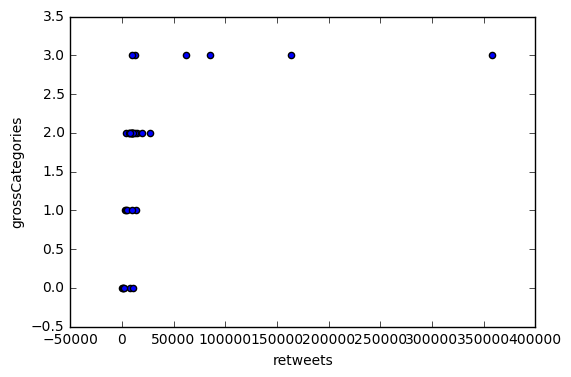

In [36]:
plt.ylabel('grossCategories')
plt.xlabel('retweets')
plt.scatter(data['retweets'], data['grossByCategory'])
plt.show()

<h1 style="color:red">Cross Validation</h1>

In [56]:
from sklearn.cross_validation import cross_val_score
X=data[f_col]
print (X.shape)
y=data['gross']
print (y.shape)

(32, 4)
(32,)


In [57]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, scaled_X, y, cv=21, scoring='mean_squared_error')
print(mse_list)

[ -1.25165033e+13  -3.13395599e+14  -4.68323155e+13  -3.53461124e+14
  -9.89586338e+13  -2.20495972e+14  -1.07450234e+15  -4.87180868e+13
  -3.71199416e+14  -9.41493869e+14  -1.89186681e+13  -2.28146110e+14
  -5.13794872e+14  -7.11054708e+13  -7.98717819e+15  -9.65098170e+13
  -3.08770059e+15  -1.15026054e+13  -4.27122545e+10  -8.82803736e+13
  -2.59486940e+10]


In [59]:
mse_list_positive = -mse_list

In [60]:
import numpy as np
rmse_list = np.sqrt(mse_list_positive)
print rmse_list

[  3537867.04906405  17702982.76024179   6843414.02422957
  18800561.79286608   9947795.42256016  14849106.77005625
  32779602.50374388   6979834.2954629   19266536.16130397
  30683772.07606378   4349559.52507392  15104506.29386738
  22667043.74244753   8432405.98825593  89371014.27211231
   9823941.00931666  55567081.87768379   3391549.11432798
    206669.43282922   9395763.59751466    161085.98312348]


In [61]:
print (rmse_list.mean())

18088671.1282
